**Predict Student Grades, Based on Studying Hours**

### Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Get data

In [3]:
df = pd.read_csv("student_scores_data.csv")

**Have an overview of the entire dataset**

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Visualise relationships between all columns.**

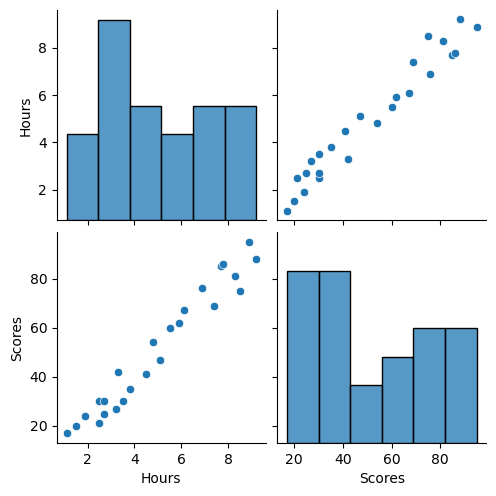

In [5]:
# Relationships between features
sns.pairplot(df)

**Visualize histogram of Scores**

<AxesSubplot:xlabel='Scores', ylabel='Count'>

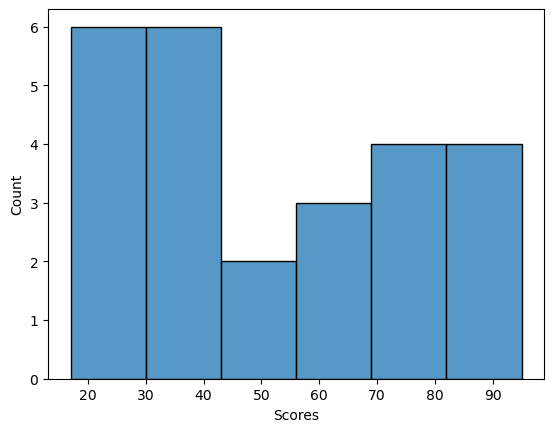

In [7]:
sns.histplot(data=df["Scores"])

**Visualize the correlation heatmap between variables**

<AxesSubplot:>

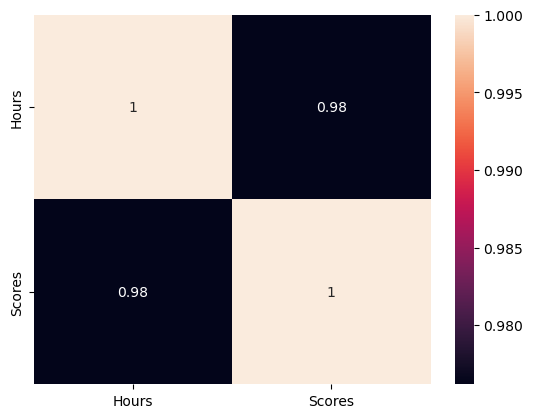

In [8]:
sns.heatmap(df.corr(), annot=True)

### Train-test Dataset

Splitting Data into Training Data Set and Test Data Set.

**Split dependant variables y and independant variables x**

In [60]:
X=df.iloc[:, 0].values
y=df.iloc[:, 1].values
X=X.reshape(-1,1)

<class 'numpy.ndarray'>


**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

**how much data in train and in test ?**

In [43]:
print(len(x_train))
print(len(x_test))

17
8


## Creating and Training the Model

Train a LinearRegression model on our training data!


**Import from scikit learn.**

In [44]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model.**

In [45]:
model = LinearRegression()

**Train/fit model on the training data.**

Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future unseen data
Learn from Features, and their Associated true outcomes.

In [46]:
model.fit(x_train,y_train)

LinearRegression()

### Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).


**Use .predict() to predict off the X_test set of the data.**

In [47]:
pred = model.predict(x_test)

**Create a scatterplot of the real test values versus the predicted values.**

<AxesSubplot:xlabel='Scores'>

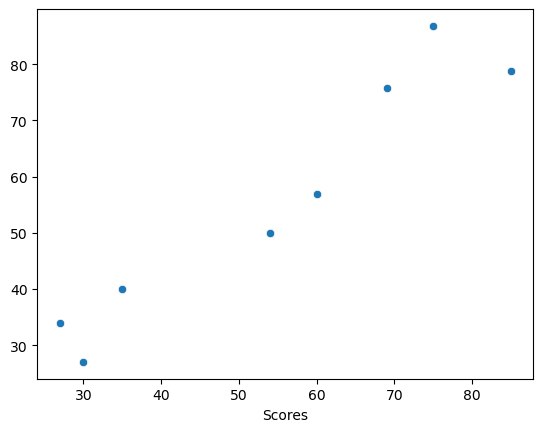

In [49]:
sns.scatterplot(x=y_test,y=pred)

### Evaluating the Model


The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

**Calculate these metrics using skleanr**

In [52]:
MAE = mean_absolute_error(y_test,pred)
MSE = mean_squared_error(y_test,pred)
RMSE = np.sqrt(MSE)

**Plot a histogram of the residuals (difference between real labels and predicted labels) and make sure it looks normally distributed.** This helps us understand if Linear Regression was a valid model choice.

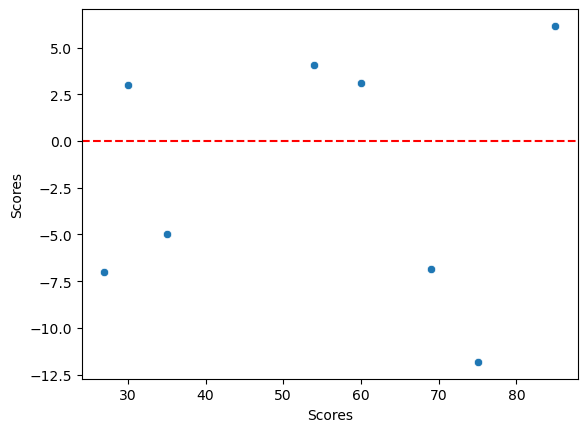

In [54]:
test_res = y_test - pred
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

**Interpreting the coefficients of our model**

In [55]:
model.coef_

array([9.96651548])

### Prediction on New Data

Recall , X_test data set looks exactly the same as brand new data, so we simply need to call .predict().

What are the associated scores for these Hours [3.9, 2.4, 0.6, 9.4, 0.5]

PS: Carefull, we expect a 2D Array.

In [74]:
new_data=np.array([3.9, 2.4, 0.6, 9.4, 0.5])
new_data=new_data.reshape(-1,1)

In [75]:
y_test=model.predict(new_data)

In [76]:
y_test

array([40.97190344, 26.02213022,  8.08240236, 95.78773858,  7.08575081])